# TFT pytorch model with baseline-v-0-raw.parquet
- The notebook is creating a model with sample data/code in Pytorch webpage

https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

Goal of the notebook
  - Create sample TFT model from data loading ~ prediction. 
  - Based on this notebook, the simple dataset in our study is applied to TFT model in the next notebook(link to be updated) 

- Edited by Rumi Nakagawa
- Spring 2023 Capstone


## Other references:
TFT with pytorch

1. https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html

2. https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

3. https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/Forecasting/TFT#getting-the-data

4. https://towardsdatascience.com/temporal-fusion-transformer-time-series-forecasting-with-deep-learning-complete-tutorial-d32c1e51cd91

TFT with Tensorflow
1. https://github.com/greatwhiz/tft_tf2

2. https://towardsdatascience.com/temporal-fusion-transformer-googles-model-for-interpretable-time-series-forecasting-5aa17beb621


# 0. Preparation

## Mount google drive
- Make sure that available access is the user's own drive(no access across files in shared folder)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd drive/MyDrive/TFT_baseline

/content/drive/MyDrive/TFT_baseline


In [4]:
if 'google.colab' in str(get_ipython()):
  IN_COLLAB = True
else:
  IN_COLLAB = False

#TODO: CHANGE THIS BASED ON YOUR OWN LOCAL SETTINGS
# MY_HOME_ABS_PATH = "/content/drive/MyDrive/W210/co2-flux-hourly-gpp-modeling"
MY_HOME_ABS_PATH =  "/content/drive/MyDrive/TFT_baseline"

In [5]:
# This is already done above
# if IN_COLLAB:
#   from google.colab import drive
#   drive.mount('/content/drive/')

## Import libraries

In [6]:
import os
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute paths
print(os.getcwd())
# os.chdir("../../..")

/content/drive/MyDrive/TFT_baseline


#### (pip install)

In [7]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.4/826.4 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 51.2 MB/s eta 0:00:00


In [8]:
!pip install pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 15.8 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ba1454d9c7e92ecdd110cd207f7df9ecc0514ad14

In [9]:
! pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [10]:
# This is must in order to avoid error 
!pip install pytorch_lightning==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pytorch_lightning
    Found existing installation: pytorch-lightning 1.9.3
    Uninstalling pytorch-lightning-1.9.3:
      Successfully uninstalled pytorch-lightning-1.9.3


numba may potentially needed later

In [11]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install azure.storage.blob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.1 MB/s eta 0:00:00


### pytorch libraries

In [13]:
import copy
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting import BaseModel, MAE
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet


In [14]:
from pytorch_forecasting import BaseModel, MAE
from pytorch_forecasting.metrics.point import RMSE
from pytorch_forecasting.data.encoders import NaNLabelEncoder

# Load data from Azure blob

In [15]:
import sys
sys.path.append('/content/drive/MyDrive/.cred')
sys.path.append('/content/drive/MyDrive/tools')
sys.path.append('/content/drive/MyDrive/tools/CloudIO')
sys.path.append('/content/drive/MyDrive/TFT_baseline/CloudIO')
sys.path.append('/content/drive/MyDrive/TFT_baseline/.cred')
sys.path.append('/content/drive/MyDrive/TFT_baseline')

In [16]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import math
import json

from calendar import monthrange
from datetime import datetime
from io import BytesIO

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load locale custome modules
import sys
if IN_COLLAB:
  os.chdir(MY_HOME_ABS_PATH)
  # sys.path.insert(0,os.path.abspath("./code/src/tools"))
  sys.path.insert(0,os.path.abspath("tools"))
else:
  sys.path.append(os.path.abspath("tools"))

import AzStorageClient
# from CloudIO.AzStorageClient import AzStorageClient
from data_pipeline_lib import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
  

In [17]:
import AzStorageClient

In [18]:
root_dir =  MY_HOME_ABS_PATH
tmp_dir =  root_dir + os.sep + 'tmp/'
raw_data_dir = tmp_dir
data_dir = root_dir + os.sep + 'data'
cred_dir = root_dir + os.sep + 'cred'
az_cred_file = cred_dir + os.sep + 'azblobcred.json'

In [19]:
# AzStorageClient.listBlobs(container)
container = "baseline-data"
cred_file = az_cred_file
ext = "parquet"

In [20]:
from azure.storage.blob import BlobServiceClient

if os.path.exists(cred_file):
  connect_str = ""
  with open(cred_file, "rb") as f:
      data = json.load(f)
      connect_str = data['connectionstr']
      blob_svc_client = BlobServiceClient.from_connection_string(connect_str)
      tokens = connect_str.split(';')
      for t in tokens:
        if "AccountName=" in t:
          AccountName = t[len("AccountName="):]
        elif "AccountKey=" in t:
          AccountKey = t[len("AccountKey="):]

In [21]:
# Container and file name
container = "baseline-data"
blob_name_train = "baseline-train-v-1-i-knn.parquet"
blob_name_val = "baseline-test-v-1-i-knn.parquet"

In [22]:
from azure.storage.blob import BlobServiceClient
from collections import defaultdict
from io import BytesIO
import os.path
import json

In [23]:
class AzStorageClient:
    def __init__(self, cred_file):
        self.blob_svc_client = None
        self.container_client_list = defaultdict(str)
        if os.path.exists(cred_file):
            connect_str = ""
            with open(cred_file, "rb") as f:
                data = json.load(f)
                connect_str = data['connectionstr']
                self.blob_svc_client = BlobServiceClient.from_connection_string(connect_str)
                tokens = connect_str.split(';')
                for t in tokens:
                  if "AccountName=" in t:
                    self.AccountName = t[len("AccountName="):]
                  elif "AccountKey=" in t:
                    self.AccountKey = t[len("AccountKey="):]
        else:
            print("ERROR: {cred_file} not found")
    
    def getSparkSessionKeys(self):
      return [f'fs.azure.account.key.{self.AccountName}.blob.core.windows.net',  self.AccountKey, self.AccountName]

    def createContainer(self, container_name):
        if self.blob_svc_client:
            self.blob_svc_client.create_container(container_name)
            print(f"Container '{container_name}' created.")
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")

    def listBlobs(self, container_name):
        if self.blob_svc_client:
            if not self.container_client_list[container_name]:
                self.container_client_list[container_name] = self.blob_svc_client.get_container_client(container= container_name)
            blob_list = self.container_client_list[container_name].list_blobs()
            return blob_list
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")

    def uploadBlob(self, container_name, blob_name, data, overwrite=False, verbose=True):
        if self.blob_svc_client:
            blob_cleint = self.blob_svc_client.get_blob_client(container=container_name, blob=blob_name)
            blob_cleint.upload_blob(data, overwrite=overwrite)
            if verbose:
                print(f'File uploaded to {container_name}/{blob_name}')
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")
    
    def downloadBlob(self, container_name, blob_name):
        if self.blob_svc_client:
            if not self.container_client_list[container_name]:
                self.container_client_list[container_name] = self.blob_svc_client.get_container_client(container= container_name)
            
            return self.container_client_list[container_name].download_blob(blob_name).readall()
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")
    
    def downloadBlob2Stream(self, container_name, blob_name):
        if self.blob_svc_client:
            if not self.container_client_list[container_name]:
                self.container_client_list[container_name] = self.blob_svc_client.get_container_client(container= container_name)
            
            stream = BytesIO()
            self.container_client_list[container_name].download_blob(blob_name).readinto(stream)
            return stream
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")
    
    def deleteBlob(self, container_name, blob_name, verbose=True):
        if self.blob_svc_client:
            blob_client = self.blob_svc_client.get_blob_client(container=container_name, blob=blob_name)
            blob_client.delete_blob()
            if verbose:
                print(f'{container_name}/{blob_name} deleted')
        else:
            print("ERROR: Azure Storage Blob Client does not exist.")

In [24]:
import os
import pandas as pd
from IPython.display import display

def get_min_max(df):
  return (df.min(), df.max())

def get_min_max_datetime(df):
  return (pd.to_datetime(df).min(), pd.to_datetime(df).max())

def is_leap_year(year):
  return year%4 == 0 ;

def data_cleanup(data_dir, site_id_file_df, target, target_qc, features):
  data_df = None
  # qc_flag_dtype = CategoricalDtype([0, 1, 2, 3], ordered=True)
  qc_flags_features = [s for s in features if "_QC" in s]

  # Iterate through each site:
  for i, r in site_id_file_df.iterrows():        
    if not r.filename or type(r.filename) != type(""):
      print(f'\nERROR: {r.site_id} is mssing hourly data.')
      continue

    # Get only `features` from file
    local_filename = data_dir + os.sep + r.filename
    site_df = pd.read_csv(local_filename, usecols = [target, target_qc] + features)
    site_df['datetime'] = pd.to_datetime(site_df['datetime'])
    site_df['date'] = pd.to_datetime(site_df['date'])
    site_df['minute'] = site_df['datetime'].dt.minute
    if len(qc_flags_features) != 0:
      site_df[qc_flags_features] = site_df[qc_flags_features].astype('int')
    site_df['site_id'] = r.site_id

    # Remove zero or negative SW
    site_df.drop(site_df[site_df['SW_IN_ERA'] <= 0].index, inplace = True)

    # Drop rows with NAs for Target Variable
    site_df.dropna(subset=[target], axis=0, inplace=True)

    # Drop rows with bad NEE_VUT_REF_QC (aka bad GPP records)
    site_df.drop(site_df[site_df[target_qc] == 3].index, inplace = True)
    site_df.drop([target_qc], axis=1, inplace=True)

    # Drop rows with any NA
    site_df.dropna(axis=0, inplace=True)

    print(f"{r.site_id}: {site_df.shape}")
    if type(data_df) == type(None):
      data_df = site_df
    else:
      data_df = pd.concat([data_df, site_df])
          
  return data_df

def merge_site_metadata(data_df, site_metadata_df):
  data_df = data_df.merge(site_metadata_df, how='left', left_on='site_id', right_on='site_id')
  return data_df

def check_and_drop_na(data_df):
  if data_df.isna().sum().sum() > 0:
    print("Data has NA.")
    display(pd.DataFrame(data_df.isna().sum()).T)
    data_df.dropna(axis=0, inplace=True)
  else:
    print("Datas has no NA.")
    

In [25]:
# Download the parquet file if there is not local copy
# ref: https://stackoverflow.com/a/68940709

train_df_0 = None
if not (os.path.exists(tmp_dir+blob_name_train)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_train)
    # read parquet
    train_df_0 = pd.read_parquet(file_stream, engine='pyarrow')
    train_df_0.to_parquet(tmp_dir + blob_name_train)
else:
    train_df_0 = pd.read_parquet(tmp_dir + blob_name_train)

print(f"size: {train_df_0.shape}")
train_df_0.head()

size: (631032, 49)


,GPP_NT_VUT_REF,site_id,timestep_idx_local,timestep_idx_global,datetime,year,month,day,hour,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,IGBP,lat,long,koppen_sub,koppen_main,c3c4,c4_percent,BESS-PAR,BESS-PARdiff,BESS-RSDN,CSIF-SIFdaily,PET,Ts,ESACCI-sm,MODIS_LC,NDWI,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,MODIS_PFT,gap_flag_hour,gap_flag_month
0,8.00070,CH-Lae,0,0,2010-01-01 00:00:00,0,0,0,0,-0.93215,-0.71272,-1.06375,-0.86296,-0.20802,0.05816,0.38113,0.83348,0.36236,-0.78665,-0.43050,-0.59344,-0.84229,-0.51919,-0.62349,-0.75516,5,0.77039,1.18369,5,2,0,-0.58974,-1.62789,-1.41854,-1.63492,-0.86451,1.08868,-1.48659,0.93231,5,0.15866,2.32445,-1.47498,-0.96933,-1.47888,-1.10114,5,0.00000,0.00000
1,8.04417,CH-Lae,1,1,2010-01-01 01:00:00,0,0,0,1,-0.96828,-0.71272,-1.07565,-0.86149,-0.20802,0.05344,0.38113,0.83348,0.36236,-0.78665,-0.43050,-0.59344,-0.84229,-0.51919,-0.62349,-0.75516,5,0.77039,1.18369,5,2,0,-0.58974,-1.62789,-1.41854,-1.63492,-0.86451,1.08868,-1.48659,0.93231,5,0.15866,2.32445,-1.47498,-0.96933,-1.47888,-1.10114,5,0.00000,0.00000
2,7.96453,CH-Lae,2,2,2010-01-01 02:00:00,0,0,0,2,-0.97002,-0.71272,-1.17342,-0.85560,-0.20802,0.04883,0.38113,0.83348,0.36236,-0.78665,-0.43050,-0.59344,-0.84229,-0.51919,-0.62349,-0.75516,5,0.77039,1.18369,5,2,0,-0.58974,-1.62789,-1.41854,-1.63492,-0.86451,1.08868,-1.48659,0.93231,5,0.15866,2.32445,-1.47498,-0.96933,-1.47888,-1.10114,5,0.00000,0.00000
3,12.28330,CH-Lae,3,3,2010-01-01 03:00:00,0,0,0,3,-1.01993,-0.71272,-1.09669,-0.84749,-0.20802,0.04701,0.38113,0.83348,0.36236,-0.78665,-0.43050,-0.59344,-0.84229,-0.51919,-0.62349,-0.75516,5,0.77039,1.18369,5,2,0,-0.58974,-1.62789,-1.41854,-1.63492,-0.86451,1.08868,-1.48659,0.93231,5,0.15866,2.32445,-1.47498,-0.96933,-1.47888,-1.10114,5,0.00000,0.00000
4,13.75710,CH-Lae,4,4,2010-01-01 04:00:00,0,0,0,4,-1.05280,-0.71272,-1.02725,-0.85290,-0.20802,0.04121,0.38113,0.83348,0.36236,-0.78665,-0.43050,-0.59344,-0.84229,-0.51919,-0.62349,-0.75516,5,0.77039,1.18369,5,2,0,-0.58974,-1.62789,-1.41854,-1.63492,-0.86451,1.08868,-1.48659,0.93231,5,0.15866,2.32445,-1.47498,-0.96933,-1.47888,-1.10114,5,0.00000,0.00000


In [26]:

test_df_0 = None
if not (os.path.exists(tmp_dir+blob_name_val)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_val)
    # read parquet
    test_df_0 = pd.read_parquet(file_stream, engine='pyarrow')
    test_df_0.to_parquet(tmp_dir + blob_name_val)
else:
    test_df_0 = pd.read_parquet(tmp_dir + blob_name_val)

print(f"size: {test_df_0.shape}")
test_df_0.head()

size: (234888, 49)


,GPP_NT_VUT_REF,site_id,timestep_idx_local,timestep_idx_global,datetime,year,month,day,hour,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,IGBP,lat,long,koppen_sub,koppen_main,c3c4,c4_percent,BESS-PAR,BESS-PARdiff,BESS-RSDN,CSIF-SIFdaily,PET,Ts,ESACCI-sm,MODIS_LC,NDWI,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,MODIS_PFT,gap_flag_hour,gap_flag_month
0,1.30673,CA-Cbo,0,0,2010-01-01 00:00:00,0,0,0,0,-1.17580,-0.71272,0.22907,-0.87683,-0.07995,0.87251,1.34874,-0.72758,-0.22281,1.01824,1.03660,2.44975,1.58852,-0.77073,-1.35122,-1.05468,1,0.36830,-0.34851,5,2,0,-0.52345,-1.14726,-0.63639,-1.16041,-1.01060,0.92265,-1.63887,-0.85179,5,0.49786,3.35380,-0.53467,-0.57577,-1.89649,-2.01633,5,0.00000,1.00000
1,1.38098,CA-Cbo,1,1,2010-01-01 01:00:00,0,0,0,1,-1.18091,-0.71272,0.11045,-0.87659,-0.06518,0.87112,0.82468,-0.72760,-0.47349,1.25023,0.82720,2.63323,1.93407,-0.50555,-1.24262,-0.97915,1,0.36830,-0.34851,5,2,0,-0.52345,-1.14726,-0.63639,-1.16041,-1.01060,0.92265,-1.63887,-0.85179,5,0.49786,3.35380,-0.53467,-0.57577,-1.89649,-2.01633,5,0.00000,1.00000
2,0.27869,CA-Cbo,2,2,2010-01-01 02:00:00,0,0,0,2,-1.19918,-0.71272,0.11045,-0.87389,-0.06518,0.87198,0.82468,-0.72760,-0.47349,1.25023,0.82720,2.63323,1.93407,-0.50555,-1.24262,-0.97915,1,0.36830,-0.34851,5,2,0,-0.52345,-1.14726,-0.63639,-1.16041,-1.01060,0.92265,-1.63887,-0.85179,5,0.49786,3.35380,-0.53467,-0.57577,-1.89649,-2.01633,5,0.00000,1.00000
3,-1.72097,CA-Cbo,3,3,2010-01-01 03:00:00,0,0,0,3,-1.21745,-0.71272,0.11045,-0.87119,-0.06518,0.87284,0.65217,-1.17147,-0.60127,1.76995,1.27795,3.17049,2.50126,-0.18988,-1.10024,-0.95277,1,0.36830,-0.34851,5,2,0,-0.52345,-1.14726,-0.63639,-1.16041,-1.01060,0.92265,-1.63887,-0.85179,5,0.49786,3.35380,-0.53467,-0.57577,-1.89649,-2.01633,5,0.00000,1.00000
4,0.67984,CA-Cbo,4,4,2010-01-01 04:00:00,0,0,0,4,-1.23572,-0.71272,0.00028,-0.86849,0.12200,0.87369,0.95731,-0.72295,-0.32818,1.09781,0.93626,2.29454,1.57462,-0.74375,-1.12675,-0.88474,1,0.36830,-0.34851,5,2,0,-0.52345,-1.14726,-0.63639,-1.16041,-1.01060,0.92265,-1.63887,-0.85179,5,0.49786,3.35380,-0.53467,-0.57577,-1.89649,-2.01633,5,0.00000,1.00000


In [27]:
test_df_0 = pd.read_parquet(tmp_dir + blob_name_val)

In [28]:
train_df_0['site_id'].unique()

array(['CH-Lae', 'ES-LJu', 'FI-Hyy', 'FR-Pue', 'IT-Lav', 'US-ARM',
       'US-NR1', 'US-SRM', 'US-Ton', 'US-UMB', 'US-Var', 'US-Vcp',
       'US-Wkg'], dtype=object)

In [29]:
test_df_0['site_id'].unique()

array(['CA-Cbo', 'ES-LM2', 'FR-Lam', 'US-AR1', 'US-GLE', 'US-Seg'],
      dtype=object)

# Data Preprocessing

## Overview of the dataset

In [30]:
train_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631032 entries, 0 to 631031
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   GPP_NT_VUT_REF       631032 non-null  float64       
 1   site_id              631032 non-null  object        
 2   timestep_idx_local   631032 non-null  int64         
 3   timestep_idx_global  631032 non-null  int64         
 4   datetime             631032 non-null  datetime64[ns]
 5   year                 631032 non-null  int64         
 6   month                631032 non-null  int64         
 7   day                  631032 non-null  int64         
 8   hour                 631032 non-null  int64         
 9   TA_ERA               631032 non-null  float64       
 10  SW_IN_ERA            631032 non-null  float64       
 11  LW_IN_ERA            631032 non-null  float64       
 12  VPD_ERA              631032 non-null  float64       
 13  P_ERA         

## Check NaN values in the dataframe

In [31]:
train_df_0.isna().sum()

GPP_NT_VUT_REF         0
site_id                0
timestep_idx_local     0
timestep_idx_global    0
datetime               0
year                   0
month                  0
day                    0
hour                   0
TA_ERA                 0
SW_IN_ERA              0
LW_IN_ERA              0
VPD_ERA                0
P_ERA                  0
PA_ERA                 0
EVI                    0
NDVI                   0
NIRv                   0
b1                     0
b2                     0
b3                     0
b4                     0
b5                     0
b6                     0
b7                     0
IGBP                   0
lat                    0
long                   0
koppen_sub             0
koppen_main            0
c3c4                   0
c4_percent             0
BESS-PAR               0
BESS-PARdiff           0
BESS-RSDN              0
CSIF-SIFdaily          0
PET                    0
Ts                     0
ESACCI-sm              0
MODIS_LC               0


## Add time index to df

- `time_idx` determines the sequence of samples. This is used in TS dataset in pytorch. It is also used to make aggregated static features easier when there are multiple observations with same time point. 

- We could also create categorical features by using average or convert time features to categorical features(Ex. month)

In [32]:
train_df_0.columns

Index(['GPP_NT_VUT_REF', 'site_id', 'timestep_idx_local',
       'timestep_idx_global', 'datetime', 'year', 'month', 'day', 'hour',
       'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA', 'PA_ERA', 'EVI',
       'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'IGBP', 'lat',
       'long', 'koppen_sub', 'koppen_main', 'c3c4', 'c4_percent', 'BESS-PAR',
       'BESS-PARdiff', 'BESS-RSDN', 'CSIF-SIFdaily', 'PET', 'Ts', 'ESACCI-sm',
       'MODIS_LC', 'NDWI', 'Percent_Snow', 'Fpar', 'Lai', 'LST_Day',
       'LST_Night', 'MODIS_PFT', 'gap_flag_hour', 'gap_flag_month'],
      dtype='object')

In [33]:
# Slim down features to make a model simpler
features = ['GPP_NT_VUT_REF', 'site_id', 'timestep_idx_local',
       'timestep_idx_global', 'datetime', 'year', 'month', 'day', 'hour',
       'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA', 'PA_ERA', 'EVI',
       'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'IGBP', 'lat',
       'long', 'koppen_sub', 'koppen_main', 'c3c4', 'c4_percent', 'BESS-PAR',
       'BESS-PARdiff', 'BESS-RSDN', 'CSIF-SIFdaily', 'PET', 'Ts', 'ESACCI-sm',
       'MODIS_LC', 'NDWI', 'Percent_Snow', 'Fpar', 'Lai', 'LST_Day',
       'LST_Night', 'MODIS_PFT', 'gap_flag_hour', 'gap_flag_month']

train_df_0 = train_df_0[features]
test_df_0 = test_df_0[features]

# c3c4
# c4_percent not included

# Define train/val/test set

## Define period

Filter with a week data for both training and encoding

In [34]:
print(train_df_0.groupby(['year'])['datetime'].count()) #,'month'

year
0    113880
1    113880
2    114192
3    113880
4    113880
5     61320
Name: datetime, dtype: int64


In [35]:
print(train_df_0.groupby(['day'])['datetime'].count()) #,'month'
print(type(train_df_0['month']))

day
0     20736
1     20736
2     20736
3     20736
4     20736
5     20736
6     20736
7     20736
8     20736
9     20736
10    20736
11    20736
12    20736
13    20736
14    20736
15    20736
16    20736
17    20736
18    20736
19    20736
20    20736
21    20736
22    20736
23    20736
24    20736
25    20736
26    20736
27    20736
28    19320
29    19008
30    12096
Name: datetime, dtype: int64
<class 'pandas.core.series.Series'>


## Filter orignal train set

In [45]:
train_df = train_df_0[train_df_0['year']==5]
train_only_df = train_df[train_df['month']==train_df['month'].max()]
train_only_df = train_df[train_df['day']<=25]
train_val_df = train_df[train_df['month']==train_df['month'].max()]
# train_df = train_df[train_df['day']>=23][train_df['day']<=30] # 30 is for validation

print(train_df.groupby(['year'])['datetime'].count())
print(train_df.groupby(['month'])['datetime'].count())
print(train_df.groupby(['day'])['datetime'].count()) #,'month'
print(train_df.shape)

train_df

year
5    61320
Name: datetime, dtype: int64
month
0     5208
1     4704
2     5208
3     5040
4     5208
5     5040
6     5208
7     5208
8     5040
9     5208
10    5040
11    5208
Name: datetime, dtype: int64
day
0     2016
1     2016
2     2016
3     2016
4     2016
5     2016
6     2016
7     2016
8     2016
9     2016
10    2016
11    2016
12    2016
13    2016
14    2016
15    2016
16    2016
17    2016
18    2016
19    2016
20    2016
21    2016
22    2016
23    2016
24    2016
25    2016
26    2016
27    2016
28    1848
29    1848
30    1176
Name: datetime, dtype: int64
(61320, 49)


,GPP_NT_VUT_REF,site_id,timestep_idx_local,timestep_idx_global,datetime,year,month,day,hour,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,IGBP,lat,long,koppen_sub,koppen_main,c3c4,c4_percent,BESS-PAR,BESS-PARdiff,BESS-RSDN,CSIF-SIFdaily,PET,Ts,ESACCI-sm,MODIS_LC,NDWI,Percent_Snow,Fpar,Lai,LST_Day,LST_Night,MODIS_PFT,gap_flag_hour,gap_flag_month
43824,9.07615,CH-Lae,43824,43824,2015-01-01 00:00:00,5,0,0,0,-1.80050,-0.71272,-1.42477,-0.89316,-0.20802,0.47183,0.53032,-1.49847,-0.70512,3.20520,2.58469,4.68822,4.01336,-0.71648,-1.22958,-1.06296,5,0.77039,1.18369,5,2,0,-0.58974,-1.60337,-1.41854,-1.62393,-0.69051,1.06270,-1.13270,0.93231,5,0.13783,1.39708,-1.02182,-0.86001,-1.14838,-1.11043,5,0.00000,0.00000
43825,-8.90839,CH-Lae,43825,43825,2015-01-01 01:00:00,5,0,0,1,-1.79315,-0.71272,-1.37055,-0.89464,-0.20802,0.47001,0.53032,-1.49847,-0.70512,3.20520,2.58469,4.68822,4.01336,-0.71648,-1.22958,-1.06296,5,0.77039,1.18369,5,2,0,-0.58974,-1.60337,-1.41854,-1.62393,-0.69051,1.06270,-1.13270,0.93231,5,0.13783,1.39708,-1.02182,-0.86001,-1.14838,-1.11043,5,0.00000,0.00000
43826,-0.97188,CH-Lae,43826,43826,2015-01-01 02:00:00,5,0,0,2,-1.78958,-0.71272,-1.46610,-0.89439,-0.20802,0.47033,0.53032,-1.49847,-0.70512,3.20520,2.58469,4.68822,4.01336,-0.71648,-1.22958,-1.06296,5,0.77039,1.18369,5,2,0,-0.58974,-1.60337,-1.41854,-1.62393,-0.69051,1.06270,-1.13270,0.93231,5,0.13783,1.39708,-1.02182,-0.86001,-1.14838,-1.11043,5,0.00000,0.00000
43827,-0.98214,CH-Lae,43827,43827,2015-01-01 03:00:00,5,0,0,3,-1.76702,-0.71272,-1.42683,-0.89329,-0.20802,0.47215,0.53032,-1.49847,-0.70512,3.20520,2.58469,4.68822,4.01336,-0.71648,-1.22958,-1.06296,5,0.77039,1.18369,5,2,0,-0.58974,-1.60337,-1.41854,-1.62393,-0.69051,1.06270,-1.13270,0.93231,5,0.13783,1.39708,-1.02182,-0.86001,-1.14838,-1.11043,5,0.00000,0.00000
43828,-1.04656,CH-Lae,43828,43828,2015-01-01 04:00:00,5,0,0,4,-1.77304,-0.71272,-1.44658,-0.89635,-0.20802,0.47215,0.53032,-1.49847,-0.70512,3.20520,2.58469,4.68822,4.01336,-0.71648,-1.22958,-1.06296,5,0.77039,1.18369,5,2,0,-0.58974,-1.60337,-1.41854,-1.62393,-0.69051,1.06270,-1.13270,0.93231,5,0.13783,1.39708,-1.02182,-0.86001,-1.14838,-1.11043,5,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587203,1.07426,US-Vcp,52579,52579,2015-12-31 19:00:00,5,11,30,19,-1.78050,-0.71272,-2.06270,-0.69306,-0.20802,-1.60787,-0.38435,-0.97055,-0.72055,1.12467,0.37646,1.64115,1.39945,-1.08437,-1.23385,-0.95846,3,-0.70689,-0.81121,5,2,0,-0.58731,-0.85789,-0.89209,-0.79134,-0.79254,-0.19821,-1.37281,0.31657,4,0.01974,1.10951,-0.62530,-0.72882,-1.05158,-1.28168,5,0.00000,1.00000
587204,1.07426,US-Vcp,52580,52580,2015-12-31 20:00:00,5,11,30,20,-2.00843,-0.71272,-1.90346,-0.74634,-0.20802,-1.60315,1.06679,-0.69995,-0.10840,1.11460,1.29537,2.18345,1.92454,-0.61058,-1.29991,-0.96182,3,-0.70689,-0.81121,5,2,0,-0.58731,-0.85789,-0.89209,-0.79134,-0.79254,-0.19821,-1.37281,0.31657,4,0.01974,1.10951,-0.62530,-0.72882,-1.05158,-1.28168,5,0.00000,1.00000
587205,1.07426,US-Vcp,52581,52581,2015-12-31 21:00:00,5,11,30,21,-2.11173,-0.71272,-1.90346,-0.75923,-0.20802,-1.59854,2.14490,-0.61191,-0.02064,0.97628,1.26988,2.45440,2.02821,-0.59839,-1.23171,-0.93311,3,-0.70689,-0.81121,5,2,0,-0.58731,-0.85789,-0.89209,-0.79134,-0.79254,-0.19821,-1.37281,0.31657,4,0.01974,1.10951,-0.62530,-0.72882,-1.05158,-1.28168,5,0.00000,1.00000
587206,1.07426,US-Vcp,52582,52582,2015-12-31 22:00:00,5,11,30,22,-2.21513,-0.71272,-1.90346,-0.77224,-0.20802,-1.59393,2.20051,-0.89523,-0.21133,1.58529,1.65513,3.30442,2.77254,-0.43679,-1.15347,-0.94605,3,-0.70689,-0.81121,5,2,0,-0.58731,-0.85789,-0.89209,-0.79134,-0.79254,-0.19821,-1.37281,0.31657,4,0.01974,1.10951,-0.62530,-0.72882,-1.05158,-1.28168,5,0.00000,1.00000


NOTE: ask team if we want to keep categorical variable as categorical


In [37]:
# # Add time index


# # Code sample from sample data(We might want to use average data data)
# # add additional features
# train_df["month"] = train_df.month.astype(str).astype("category")  # categories have be strings
# test_df["month"] = test_df.month.astype(str).astype("category")  # categories have be strings
# train_df["year"] = train_df.year.astype(str).astype("category")  # categories have be strings
# test_df["year"] = test_df.year.astype(str).astype("category")  # categories have be strings
# train_df["minute"] = train_df.minute.astype(str).astype("category")  # categories have be strings
# test_df["minute"] = test_df.minute.astype(str).astype("category")  # categories have be strings
# train_df["hour"] = train_df.hour.astype(str).astype("category")  # categories have be strings
# test_df["hour"] = test_df.hour.astype(str).astype("category")  # categories have be strings
# train_df["day"] = train_df.day.astype(str).astype("category")  # categories have be strings
# test_df["day"] = test_df.day.astype(str).astype("category")  # categories have be strings
# train_df["koppen_sub"] = train_df.koppen_sub.astype(str).astype("category")  # categories have be strings
# test_df["koppen_sub"] = test_df.koppen_sub.astype(str).astype("category")  # categories have be strings

# # data_df["log_volume"] = np.log(data_df.volume + 1e-8)
# # data_df["avg_volume_by_sku"] = data_df.groupby(["time_idx", "sku"], observed=True).volume.transform("mean")
# # data_df["avg_volume_by_agency"] = data_df.groupby(["time_idx", "agency"], observed=True).volume.transform("mean")

## Define cutoff of train - validation

In [38]:
# (data is already splited to train/validation set)

# length for validation set
max_prediction_length = 1
max_encoder_length = 24*7

# training_cutoff = train_df["timestep_idx"].max() - max_prediction_length

## Convert to TS dataset

**Some key variables**

`group_ids` (List[str])

- list of column names identifying a time series. This means that the group_ids identify a sample together with the time_idx. If you have only one timeseries, set this to the name of column that is constant.

`allow_missing_timesteps=True` 

- if to allow missing timesteps that are automatically filled up. Missing values refer to gaps in the time_idx, e.g. if a specific timeseries has only samples for 1, 2, 4, 5, the sample for 3 will be generated on-the-fly. Allow missings does not deal with NA values. You should fill NA values before passing the dataframe to the TimeSeriesDataSet.


`static_categoricals`

`static_reals`

- `reals` - continuous variable

`time_varying_known_categoricals`

`variable_groups`

```
`variable_groups` ={"special_days": special_days},  # group of categorical variables can be treated as one variable
```

`time_varying_known_reals`

- months and hours are includd in `time_varying_known_reals`

`time_varying_unknown_categoricals`

`time_varying_unknown_reals`

`target_normalizer`

- target_normalizer (Union[TorchNormalizer, NaNLabelEncoder, EncoderNormalizer, str, list, tuple]) – transformer that take group_ids, target and time_idx to normalize targets. You can choose from TorchNormalizer, GroupNormalizer, NaNLabelEncoder, EncoderNormalizer (on which overfitting tests will fail) or None for using no normalizer. For multiple targets, use a :py:class`~pytorch_forecasting.data.encoders.MultiNormalizer`. By default an appropriate normalizer is chosen automatically.

- Note: Example used `GroupNormalizer(groups=["agency","sku"], transformation="softplus")` and commented "use softplus and normalize by group", however we will receive error if is use `GroupNormalizer`. For baseline I used default(pytorch doc sayes `By default an appropriate normalizer is chosen automatically`) and avoided error.
  - https://github.com/jdb78/pytorch-forecasting/issues/1201




In [39]:
print(f'train_df_0["IGBP"]:        {train_df_0["IGBP"].unique()}')
print(f'test_df_0["IGBP"]:         {test_df_0["IGBP"].unique()}')
print(f'train_df_0["site_id"]:     {train_df_0["site_id"].unique()}')
print(f'test_df_0["site_id"]:      {test_df_0["site_id"].unique()}')


train_df_0["IGBP"]:        [5 6 3 2 0 7 1 4]
test_df_0["IGBP"]:         [1 7 0 4 3]
train_df_0["site_id"]:     ['CH-Lae' 'ES-LJu' 'FI-Hyy' 'FR-Pue' 'IT-Lav' 'US-ARM' 'US-NR1' 'US-SRM'
 'US-Ton' 'US-UMB' 'US-Var' 'US-Vcp' 'US-Wkg']
test_df_0["site_id"]:      ['CA-Cbo' 'ES-LM2' 'FR-Lam' 'US-AR1' 'US-GLE' 'US-Seg']


# 1. SITE_ID as group_id
- time variable is converted to time varying categorical 
- elevation need to be removed after the base line result

In [40]:
print(max_prediction_length)
print(max_encoder_length)

1
168


In [41]:
# original train set 25 days
# validation 5 days 
# max_prediction_length 1 
# max_encoder_length 24*7

In [42]:
# 'c3c4', 'c4_percent' are not included in the variables 
# 'gap_flag_hour', 'gap_flag_month'

In [46]:
training = TimeSeriesDataSet(
    # limit training 
    # train_df[lambda x: x.timestep_idx <= training_cutoff],
    data = train_only_df,
    # time index is used as input to create TS dataset
    time_idx='timestep_idx_global',
    target="GPP_NT_VUT_REF",
    group_ids=["site_id"],
    allow_missing_timesteps=True,
    min_encoder_length=max_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=['lat', 'long', "IGBP",'koppen_sub', 'koppen_main','MODIS_LC', 'MODIS_PFT'],
    time_varying_known_categoricals=[],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=['timestep_idx_global', 'year', 'month', 'day', 'hour'],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA', 'PA_ERA', 'EVI',
       'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7',  'BESS-PAR',
       'BESS-PARdiff', 'BESS-RSDN', 'CSIF-SIFdaily', 'PET', 'Ts', 'ESACCI-sm',
       'NDWI', 'Percent_Snow', 'Fpar', 'Lai', 'LST_Day','LST_Night'],
    # target_normalizer=GroupNormalizer(
    #     groups=["site_id"], transformation="softplus"
    # ),  # use softplus and normalize by group
    # categorical_encoders={
    #     '22':NaNLabelEncoder(add_nan=True),
    #     '5':NaNLabelEncoder(add_nan=True),
        # 'C101':pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True)},
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True
)


Hint of handleing error 
```
AssertionError: Time difference between steps has been idenfied as larger than 1 - set allow_missing_timesteps=True
```
https://github.com/jdb78/pytorch-forecasting/issues/134



### Create validation set

Class method `.from_datasets`
- Generate dataset with different underlying data but same variable encoders and scalers, etc.


`dataset (TimeSeriesDataSet)` – dataset from which to copy parameters

`data (pd.DataFrame)` – data from which new dataset will be generated

`stop_randomization (bool, optional)` – If to stop randomizing encoder and decoder lengths, e.g. useful for validation set. Defaults to False.

`predict (bool, optional)` – If to predict the decoder length on the last entries in the time index (i.e. one prediction per group only). Defaults to False.

`**kwargs` – keyword arguments overriding parameters in the original dataset

In [49]:
# import TimeSeriesDataSet
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
# validation = TimeSeriesDataSet.from_dataset(validating, validation_df, predict=True, stop_randomization=True)
validation = TimeSeriesDataSet.from_dataset(training, train_val_df, predict=True, stop_randomization=True)

In [50]:
# test = TimeSeriesDataSet.from_dataset(training, test_df, predict=True, stop_randomization=True)

# Create dataloader from model

In [51]:
# create dataloaders for model
batch_size = 32  # set this between 32 to 128

# train (bool, optional) – if dataloader is used for training or prediction Will shuffle and drop last batch if True. Defaults to True.
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

# Create "Baseline" model 

### (Reference on "baseline":\)

- Baseline model that uses last known target value to make prediction.

https://pytorch-forecasting.readthedocs.io/en/stable/api/pytorch_forecasting.models.baseline.Baseline.html#pytorch_forecasting.models.baseline.Baseline

Sample code for baseline

In [47]:
# # generating predictions
# predictions = Baseline().predict(dataloader)

# # calculate baseline performance in terms of mean absolute error (MAE)
# metric = MAE()
# model = Baseline()
# for x, y in dataloader:
#     metric.update(model(x), y)

# metric.compute()

In [52]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

0.5669259428977966

# Train the Temporal Fusion Transformer

- set optimizer adam, otherwise we will receive error

In [53]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=1,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    # gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),#loss=RMSE(), 
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam"
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:lightning_fabric.utilities.seed:Global seed set to 42
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 49.2k


### Optimize learning rate

In [54]:
# # find optimal learning rate
# res = trainer.tuner.lr_find(
#     tft,
#     train_dataloaders=train_dataloader,
#     val_dataloaders=val_dataloader,
#     max_lr=10.0,
#     min_lr=1e-6,
# )

# # print(f"suggested learning rate: {res.suggestion()}")
# # fig = res.plot(show=True, suggest=True)
# # fig.show()

## Option: tft with optimized learning rate

In [55]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

In [56]:
trainer = pl.Trainer(
    max_epochs=5,
    # max_steps=100,
    gpus=1,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    fast_dev_run=False,  # comment in to check that networkor dataset has no serious bugs
    # fit may stop when the fast_dev_run is set as true
    callbacks=[lr_logger, early_stop_callback], # logger + early stopping callback
    logger=logger,
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [57]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(), #loss=RMSE(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam")
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 49.2k


Even if `max-steps=100` is set it keeps stopping and saying `max_steps=1` reached, if the `fast_dev_run` was set as true in the config


In [58]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO:lightning_fabric.accelerators.cuda:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | Modu

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


# Evaluate performance

In [59]:
trainer.checkpoint_callback.best_model_path
# 'lightning_logs/lightning_logs/version_5/checkpoints/epoch=4-step=150.ckpt'

'lightning_logs/lightning_logs/version_7/checkpoints/epoch=4-step=150.ckpt'

In [60]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)

best_model_path = trainer.checkpoint_callback.best_model_path
# best_model_path = "lightning_logs/lightning_logs/version_6/checkpoints/epoch=4-step=25.ckpt"
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [61]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(2.0172)

In [62]:
#average p50 loss overall
print((actuals - predictions).abs().mean().item())
#average p50 loss per time series
print((actuals - predictions).abs().mean(axis=1))

2.017244577407837
tensor([9.1012, 0.0556, 0.8152, 1.0684, 0.3315, 1.6555, 1.0933])


In [63]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [64]:
raw_predictions.keys()

('prediction',
 'encoder_attention',
 'decoder_attention',
 'static_variables',
 'encoder_variables',
 'decoder_variables',
 'decoder_lengths',
 'encoder_lengths')

In [79]:
raw_predictions['prediction']

tensor([[[-14.9019, -13.3652,  -7.6248,  -5.2743,  -1.0187,   6.1605,  18.3433]],

        [[ -0.4909,  -0.4270,  -0.1882,  -0.0904,   0.0867,   0.3854,   0.8922]],

        [[ -0.3208,  -0.2800,  -0.1274,  -0.0650,   0.0481,   0.2388,   0.5625]],

        [[ -2.7276,  -2.2998,  -0.7016,  -0.0471,   1.1376,   3.1364,   6.5282]],

        [[ -1.5204,  -1.3279,  -0.6084,  -0.3138,   0.2195,   1.1193,   2.6461]],

        [[ -0.5236,  -0.4814,  -0.3235,  -0.2589,  -0.1419,   0.0555,   0.3905]],

        [[ -1.7595,  -1.4817,  -0.4439,  -0.0190,   0.7503,   2.0481,   4.2505]]])

In [81]:
raw_predictions['decoder_attention']

tensor([[[[0.]]],


        [[[0.]]],


        [[[0.]]],


        [[[0.]]],


        [[[0.]]],


        [[[0.]]],


        [[[0.]]]])

In [82]:
raw_predictions['encoder_attention']

tensor([[[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]],


        [[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]],


        [[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]],


        ...,


        [[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]],


        [[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]],


        [[[0.0059, 0.0059, 0.0059,  ..., 0.0060, 0.0060, 0.0060]]]])

In [80]:
raw_predictions['static_variables']

tensor([[[0.0097, 0.0278, 0.5139, 0.0595, 0.0584, 0.0426, 0.0633, 0.0368,
          0.1730, 0.0151]],

        [[0.0090, 0.0353, 0.4324, 0.0665, 0.1008, 0.0488, 0.0758, 0.0450,
          0.1706, 0.0157]],

        [[0.0123, 0.0160, 0.6113, 0.0700, 0.0481, 0.0372, 0.0605, 0.0318,
          0.1010, 0.0119]],

        [[0.0096, 0.0289, 0.5154, 0.0630, 0.0586, 0.0422, 0.0636, 0.0336,
          0.1701, 0.0149]],

        [[0.0077, 0.0697, 0.1633, 0.0746, 0.1092, 0.0604, 0.1011, 0.0511,
          0.3392, 0.0238]],

        [[0.0087, 0.0331, 0.3783, 0.0679, 0.0765, 0.0502, 0.0855, 0.0409,
          0.2393, 0.0196]],

        [[0.0101, 0.0278, 0.4681, 0.0548, 0.0570, 0.0436, 0.0643, 0.0368,
          0.2202, 0.0172]]])

In [86]:
print(raw_predictions['encoder_variables'].shape)
raw_predictions['encoder_variables'][0]

torch.Size([7, 168, 1, 35])


tensor([[[7.0236e-05, 4.6532e-05, 3.3820e-05,  ..., 5.7573e-05,
          5.7353e-05, 4.8695e-05]],

        [[7.1043e-05, 4.7088e-05, 3.2563e-05,  ..., 5.7936e-05,
          5.8040e-05, 5.1044e-05]],

        [[7.1040e-05, 4.7092e-05, 3.2345e-05,  ..., 5.7824e-05,
          5.8038e-05, 5.1451e-05]],

        ...,

        [[7.0499e-05, 4.6707e-05, 3.2803e-05,  ..., 5.7493e-05,
          5.7562e-05, 5.0203e-05]],

        [[7.0484e-05, 4.6702e-05, 3.2768e-05,  ..., 5.7463e-05,
          5.7556e-05, 5.0233e-05]],

        [[7.0455e-05, 4.6684e-05, 3.2778e-05,  ..., 5.7433e-05,
          5.7534e-05, 5.0205e-05]]])

In [65]:
raw_predictions['decoder_lengths']


tensor([1, 1, 1, 1, 1, 1, 1])

In [66]:
 raw_predictions['encoder_lengths']

tensor([168, 168, 168, 168, 168, 168, 168])

In [78]:
raw_predictions['static_variables']

tensor([[[0.0097, 0.0278, 0.5139, 0.0595, 0.0584, 0.0426, 0.0633, 0.0368,
          0.1730, 0.0151]],

        [[0.0090, 0.0353, 0.4324, 0.0665, 0.1008, 0.0488, 0.0758, 0.0450,
          0.1706, 0.0157]],

        [[0.0123, 0.0160, 0.6113, 0.0700, 0.0481, 0.0372, 0.0605, 0.0318,
          0.1010, 0.0119]],

        [[0.0096, 0.0289, 0.5154, 0.0630, 0.0586, 0.0422, 0.0636, 0.0336,
          0.1701, 0.0149]],

        [[0.0077, 0.0697, 0.1633, 0.0746, 0.1092, 0.0604, 0.1011, 0.0511,
          0.3392, 0.0238]],

        [[0.0087, 0.0331, 0.3783, 0.0679, 0.0765, 0.0502, 0.0855, 0.0409,
          0.2393, 0.0196]],

        [[0.0101, 0.0278, 0.4681, 0.0548, 0.0570, 0.0436, 0.0643, 0.0368,
          0.2202, 0.0172]]])

In [68]:
raw_predictions["prediction"].shape
raw_predictions["prediction"][0]

tensor([[-14.9019, -13.3652,  -7.6248,  -5.2743,  -1.0187,   6.1605,  18.3433]])

In [69]:
raw_predictions["prediction"][1]

tensor([[-0.4909, -0.4270, -0.1882, -0.0904,  0.0867,  0.3854,  0.8922]])

In [70]:
raw_predictions["prediction"].shape

torch.Size([7, 1, 7])

In [71]:
raw_predictions.keys()

('prediction',
 'encoder_attention',
 'decoder_attention',
 'static_variables',
 'encoder_variables',
 'decoder_variables',
 'decoder_lengths',
 'encoder_lengths')

In [72]:
raw_predictions["prediction"]

tensor([[[-14.9019, -13.3652,  -7.6248,  -5.2743,  -1.0187,   6.1605,  18.3433]],

        [[ -0.4909,  -0.4270,  -0.1882,  -0.0904,   0.0867,   0.3854,   0.8922]],

        [[ -0.3208,  -0.2800,  -0.1274,  -0.0650,   0.0481,   0.2388,   0.5625]],

        [[ -2.7276,  -2.2998,  -0.7016,  -0.0471,   1.1376,   3.1364,   6.5282]],

        [[ -1.5204,  -1.3279,  -0.6084,  -0.3138,   0.2195,   1.1193,   2.6461]],

        [[ -0.5236,  -0.4814,  -0.3235,  -0.2589,  -0.1419,   0.0555,   0.3905]],

        [[ -1.7595,  -1.4817,  -0.4439,  -0.0190,   0.7503,   2.0481,   4.2505]]])

In [73]:
x.keys()

dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])

In [74]:
print('encoder_cat')
print(x['encoder_cat'])
print(x['encoder_cat'].shape)

print(x['encoder_cont'])
print(x['encoder_cont'].shape)

print('encoder_target')
print(x['encoder_target'])
print(x['encoder_target'].shape)


print('encoder_lengths')
print(x['encoder_lengths'])
print(x['encoder_lengths'].shape)

print('decoder_cat')
print(x['decoder_cat'])
print(x['decoder_cat'].shape)


print('decoder_cont')
print(x['decoder_cont'])
print(x['decoder_cont'].shape)


print('decoder_target')
print(x['decoder_target'])
print(x['decoder_target'].shape)


print('decoder_lengths')
print(x['decoder_lengths'])
print(x['decoder_lengths'].shape)


print('decoder_time_idx')
print(x['decoder_time_idx'])
print(x['decoder_time_idx'].shape)

print('groups')
print(x['groups'])
print(x['groups'].shape)

print('target_scale')
print(x['target_scale'])
print(x['target_scale'].shape)


encoder_cat
tensor([], size=(7, 168, 0), dtype=torch.int64)
torch.Size([7, 168, 0])
tensor([[[ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574],
         [ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574],
         [ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574],
         ...,
         [ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574],
         [ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574],
         [ 0.3711,  0.8166,  1.0377,  ..., -0.4292, -0.7502, -0.2574]],

        [[-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037],
         [-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037],
         [-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037],
         ...,
         [-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037],
         [-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037],
         [-0.8686,  0.6091,  1.5566,  ..., -0.9016, -0.2383, -0.2037]],

        [[ 2.0594,  1.1141,  0.0

## Plot

- The gray lines in all previous plots represent the attention scores. Look at those plots again — do you notice anything? Figure 8 shows the findings of Figure 7 and also accounts for the attention scores:

- The attention scores reveal how impactful are those time steps when the model outputs its prediction. 

- **The small peaks reflect the daily seasonality, while the higher peak towards the end probably implies the weekly seasonality.**

**Studying the attention weights of TFT has extra advantages:**

- We can confirm our model captures the apparent seasonal dynamics of our sequences.

- Our model may also reveal hidden patterns because the attention weights of the current input windows consider all past inputs.

- The attention weights plot is not the same as an autocorrelation plot: The autocorrelation plot refers to a particular sequence, while the attention weights here focus on the impact of each timestep by looking across all covariates and time series.


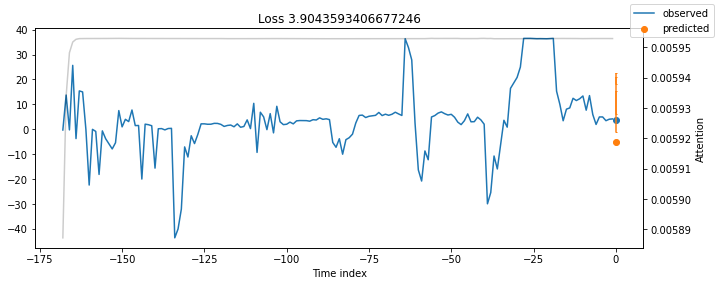

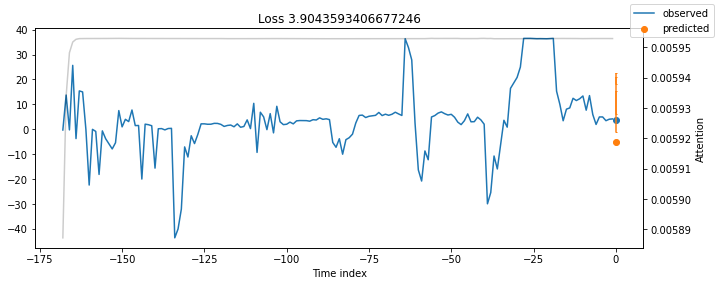

In [75]:
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True, ax=ax)

IndexError: ignored

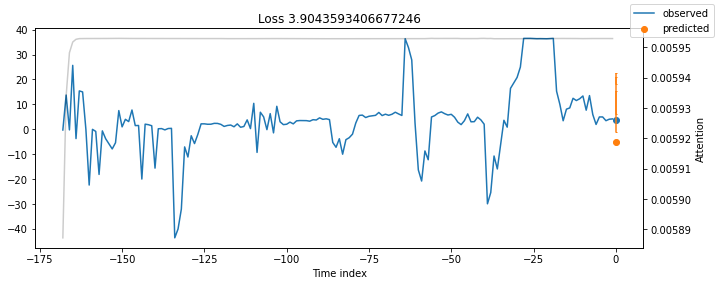

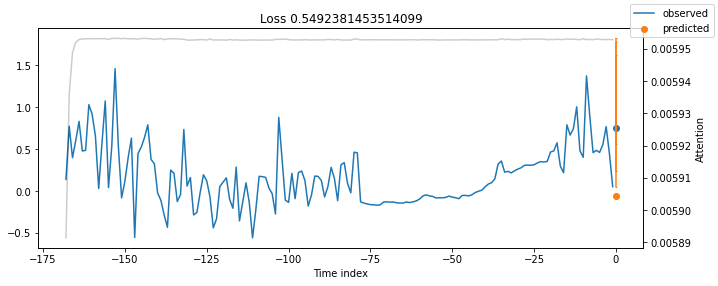

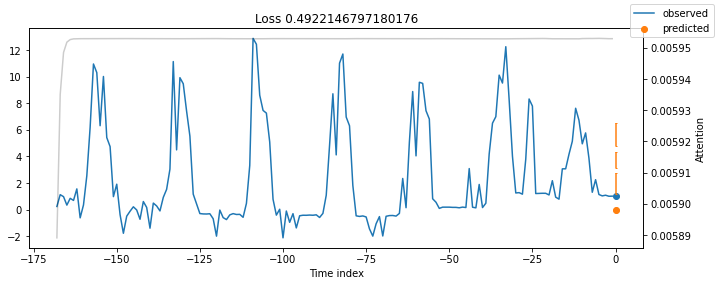

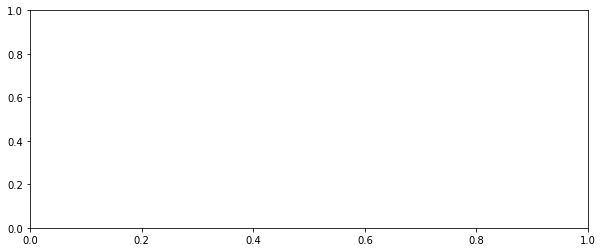

In [76]:
# for idx in range(20):
fig, ax = plt.subplots(figsize=(10, 4)) # number should be the unique number of group = sites in this study
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True, ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=2, add_loss_to_title=True, ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=3, add_loss_to_title=True, ax=ax)
fig, ax = plt.subplots(figsize=(10, 4))

best_tft.plot_prediction(x, raw_predictions, idx=10, add_loss_to_title=True, ax=ax);
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=50, add_loss_to_title=True, ax=ax);
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=100, add_loss_to_title=True, ax=ax);
fig, ax = plt.subplots(figsize=(10, 4))
best_tft.plot_prediction(x, raw_predictions, idx=150, add_loss_to_title=True, ax=ax);

# Predict on new data
Because we have covariates in the dataset, predicting on new data requires us to define the known covariates upfront.

In [ ]:
# select last 24 months from data (max_encoder_length is 24)


encoder_data = data[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]

# select last known data point and create decoder data from it by repeating it and incrementing the month
# in a real world dataset, we should not just forward fill the covariates but specify them to account
# for changes in special days and prices (which you absolutely should do but we are too lazy here)
last_data = data[lambda x: x.time_idx == x.time_idx.max()]
decoder_data = pd.concat(
    [last_data.assign(date=lambda x: x.date + pd.offsets.MonthBegin(i)) for i in range(1, max_prediction_length + 1)],
    ignore_index=True,
)

# add time index consistent with "data"
decoder_data["time_idx"] = decoder_data["date"].dt.year * 12 + decoder_data["date"].dt.month
decoder_data["time_idx"] += encoder_data["time_idx"].max() + 1 - decoder_data["time_idx"].min()

# adjust additional time feature(s)
decoder_data["month"] = decoder_data.date.dt.month.astype(str).astype("category")  # categories have be strings

# combine encoder and decoder data
new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)

# Now, we can directly predict on the generated data using the predict() method.

new_raw_predictions, new_x = best_tft.predict(new_prediction_data, mode="raw", return_x=True)

for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(new_x, new_raw_predictions, idx=idx, show_future_observed=False);

In [ ]:
new_raw_predictions, new_x = best_tft.predict(new_prediction_data, mode="raw", return_x=True)

for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(new_x, new_raw_predictions, idx=idx, show_future_observed=False);

# Features Importance

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x324 with 1 Axes>,
 'encoder_variables': <Figure size 504x774 with 1 Axes>,
 'decoder_variables': <Figure size 504x252 with 1 Axes>}

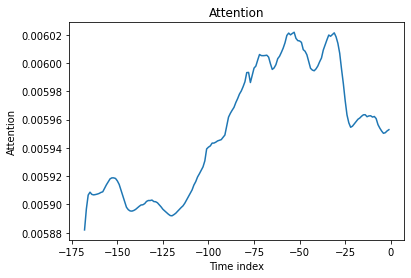

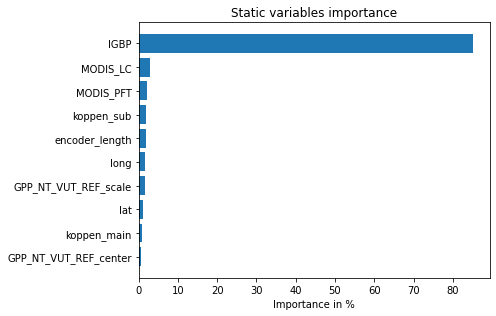

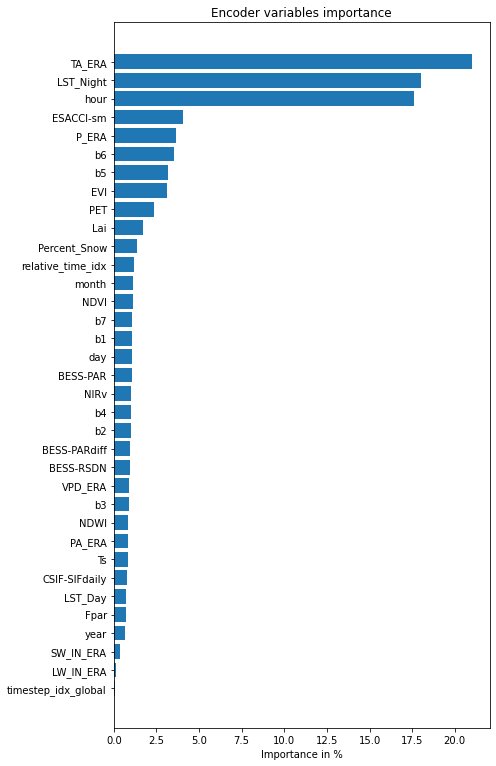

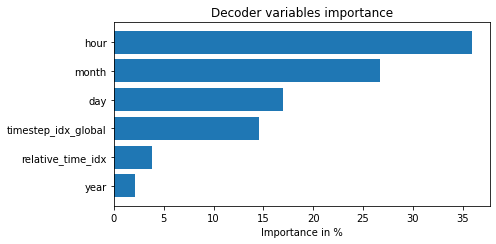

In [78]:
# raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)

# Worst performers
- Looking at the worst performers, for example in terms of SMAPE, gives us an idea where the model has issues with forecasting reliably. 
- This kind of actuals vs predictions plots are available to all models. Of course, it is also sensible to employ additional metrics, such as MASE, defined in the metrics module. However, for the sake of demonstration, we only use SMAPE here.



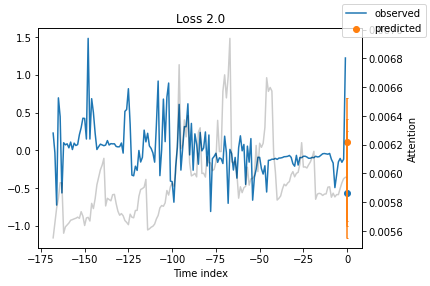

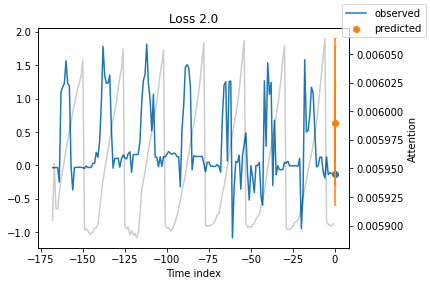

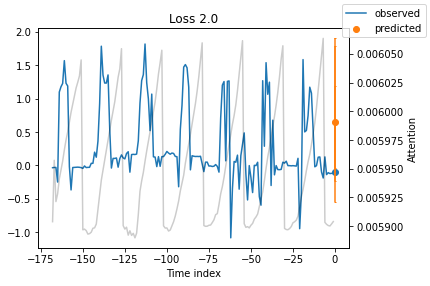

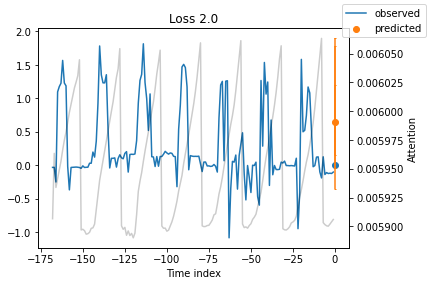

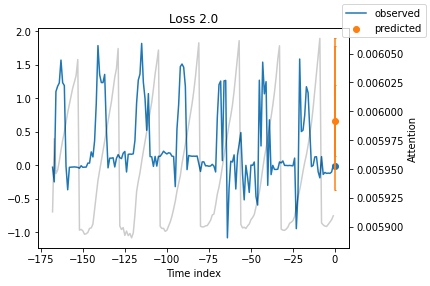

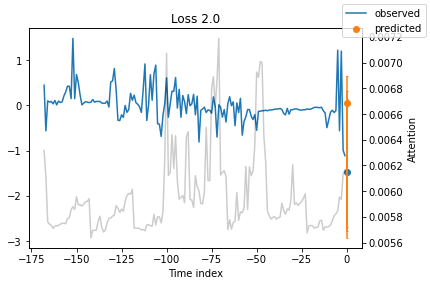

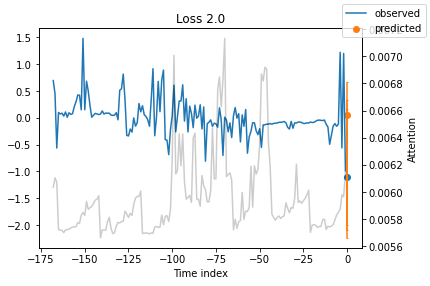

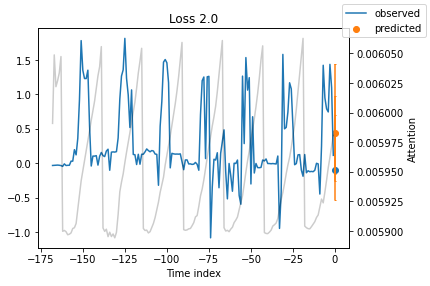

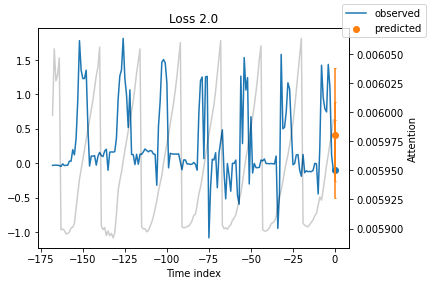

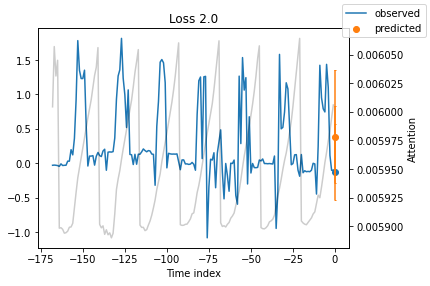

In [79]:
# calcualte metric by which to display
predictions = best_tft.predict(val_dataloader)
mean_losses = SMAPE(reduction="none")(predictions, actuals).mean(1)
indices = mean_losses.argsort(descending=True)  # sort losses
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(
        x, raw_predictions, idx=indices[idx], add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles)
    );